# Τεχνικές Eξόρυξης Δεδομένων - Άσκηση 1
_Βαργιάμης Μιχαήλ, sdi1300018_

---

In [1]:
import collections
import copy
import itertools
import matplotlib as plt
import numpy as np
import pandas as pd

In [2]:
netflix_titles = "netflix_titles.csv"
imdb_movies = "IMDb movies.csv"
imdb_ratings = "IMDb ratings.csv"

In [3]:
df1 = pd.read_csv(netflix_titles)
df2 = pd.read_csv(imdb_movies, low_memory=False)
df3 = pd.read_csv(imdb_ratings)

In [4]:
def replace_nan(df):
    for i in df.columns:
        df[i] = df[i].fillna("None")

In [5]:
replace_nan(df1)
replace_nan(df2)
replace_nan(df3)

In [6]:
df1 = df1.head(100)

In [7]:
df2 = df2.head(10)

### Ερώτημα 1

In [8]:
# print(df1.type.describe())
print(df1.type.value_counts())

Movie      79
TV Show    21
Name: type, dtype: int64


### Ερώτημα 2

In [9]:
# print(df1.query('release_year > 2015').type.describe())
print(df1.query('release_year > 2015').type.value_counts())

Movie      48
TV Show    18
Name: type, dtype: int64


### Ερώτημα 3

In [10]:
# print(df1.country.describe())
print(df1.country.value_counts())

United States                         33
India                                 11
South Korea                            6
Turkey                                 5
United Kingdom                         5
None                                   4
Indonesia                              4
Canada                                 3
Spain                                  3
Mexico                                 2
Italy                                  2
Nigeria                                2
France                                 2
Romania                                2
Thailand                               1
South Africa, Nigeria                  1
Brazil                                 1
Japan                                  1
United States, Germany                 1
Hong Kong, China, Singapore            1
United States, France, Serbia          1
Singapore                              1
South Africa, China, United States     1
Egypt                                  1
Poland, United S

### Ερώτημα 4

In [11]:
df0 = pd.DataFrame(columns = ['country', 'listed_in'])
for country, genre in zip(df1.country, df1.listed_in):
    countries = [s.strip() for s in country.split(',')]
    genres = [s.strip() for s in genre.split(',')]
    for c, g in itertools.product(countries, genres):
        temp = {'country': c, 'listed_in': g}
        df0 = df0.append(temp, ignore_index=True)

df0.groupby("country").listed_in.unique()

country
Argentina         [Action & Adventure, Comedies, International M...
Brazil            [International TV Shows, TV Dramas, TV Sci-Fi ...
Canada            [Documentaries, International Movies, Comedies...
China                    [Action & Adventure, International Movies]
Egypt                         [Horror Movies, International Movies]
France            [Comedies, Dramas, International Movies, Actio...
Germany                                        [Action & Adventure]
Hong Kong                [Action & Adventure, International Movies]
Iceland           [Dramas, Thrillers, Horror Movies, Internation...
India             [Horror Movies, International Movies, Thriller...
Indonesia         [Dramas, International Movies, Romantic Movies...
Italy             [Documentaries, International Movies, Dramas, ...
Japan                        [Anime Series, International TV Shows]
Mexico            [Dramas, International Movies, Crime TV Shows,...
Nigeria           [Dramas, International

### Ερώτημα 5

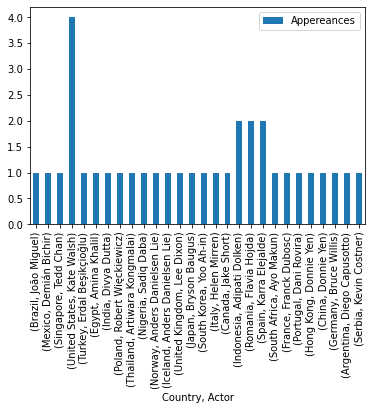

In [12]:
# For this question, no distinction were made between Movies and Tv Series

from collections import Counter

# Create dictionary with all actor appereances for each country
top_actors = {}
for cast, countries in zip(df1.cast, df1.country):
    for country in [s.strip() for s in countries.split(',')]:
        if country not in top_actors:
            top_actors[country] = [s.strip() for s in cast.split(',')]
        else:
            top_actors[country].extend([s.strip() for s in cast.split(',')])


# Create list of tuples ((country, most_famous_actor), appereances)
# for each country
data = []
for country, actor_list in top_actors.items():
    if country == "None":
        continue
    counter = Counter(actor_list)
    most_common = counter.most_common()

    if most_common[0][0] != "None":
        data.append(((country, most_common[0][0]), most_common[0][1]))
    else:
        data.append(((country, most_common[1][0]), most_common[1][1]))

# Import data into a dataframe and plot
df0 = pd.DataFrame(data, columns = ['Country, Actor', 'Appereances'])
df0.plot.bar(x='Country, Actor')   
None

### Ερώτημα 6

Counter({'Mature': 37, 'Teens': 30, 'Older kids': 6, 'Little Kids': 3})
Counter({'Mature': 12, 'Teens': 8, 'Older kids': 1})


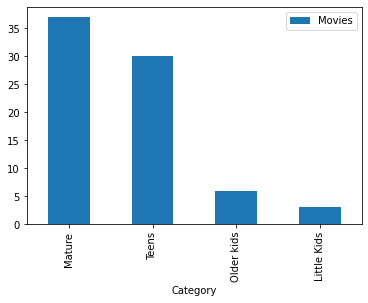

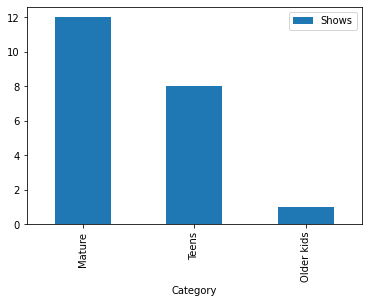

In [13]:
group_names = ["Little Kids","Older kids", "Teens", "Mature" ]
groups = {
    group_names[0]: ["G", "TV-Y", "TV-G"],
    group_names[1]: ["PG, TV-Y7", "TV-Y7-FV", "TV-PG"],
    group_names[2]: ["PG-13", "TV-14"],
    group_names[3]: ["R", "NC-17", "TV-MA"]
}

c_movies = Counter()
c_shows = Counter()
for r, t in zip(df1.rating, df1.type):
    for i in range(len(group_names)):
        if r in groups[group_names[i]]:
            if t == "Movie":
                c_movies[group_names[i]] += 1
            elif t == "TV Show":
                c_shows[group_names[i]] += 1
print(c_movies)
print(c_shows)
df_movies = pd.DataFrame.from_dict(c_movies, orient='index').reset_index().rename(columns={'index': 'Category', 0: 'Movies' })
df_shows = pd.DataFrame.from_dict(c_shows, orient='index').reset_index().rename(columns={'index': 'Category', 0: 'Shows' })
df_movies.plot.bar(x='Category')   
df_shows.plot.bar(x='Category')   
None

### Ερώτημα 7

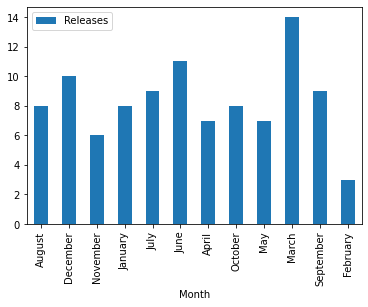

In [14]:
c = Counter()
for d in df1.date_added:
    d = d.split()[0]
    c[d] += 1
 
df0 = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns={'index': 'Month', 0: 'Releases' })
df0.plot.bar(x='Month')
None

### Ερώτημα 8

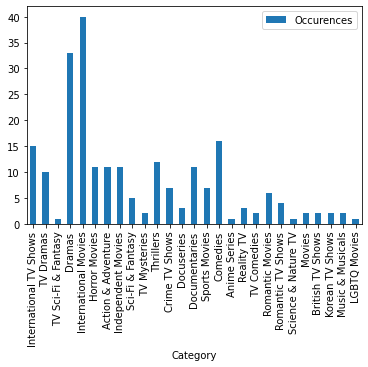

In [15]:
c = Counter()
for category_list in df1.listed_in:
    for category in [s.strip() for s in category_list.split(',')]:
        c[category] += 1
 
df0 = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns={'index': 'Category', 0: 'Occurences' })
df0.plot.bar(x='Category')
None

### Ερώτημα 9

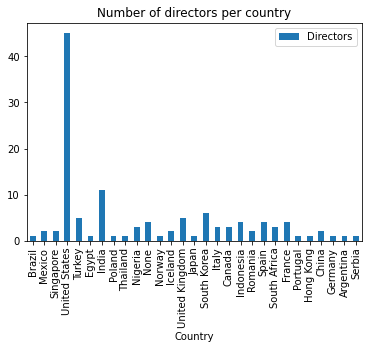

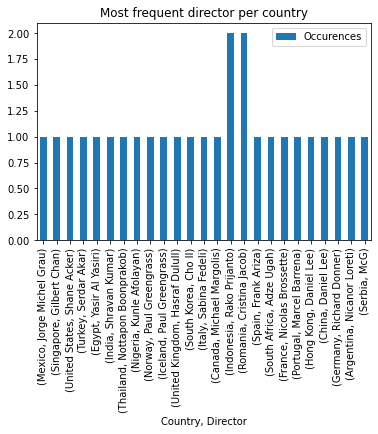

In [16]:
from collections import defaultdict
c = Counter()
directors_per_country = defaultdict(Counter)

for country_list, director_list in zip(df1.country, df1.director):
    for country in [s.strip() for s in country_list.split(',')]:
        for director in [s.strip() for s in director_list.split(',')]:
            c[country] += 1
            directors_per_country[country][director] += 1

data = []
for country, directors in directors_per_country.items():
    if country == "None":
        continue
    if directors.most_common()[0][0] != "None":
        data.append(((country, directors.most_common()[0][0]), directors.most_common()[0][1]))
    else:
        if len(directors) < 2:
            continue
        data.append(((country, directors.most_common()[1][0]), directors.most_common()[1][1]))

df00 = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns={'index': 'Country', 0: 'Directors' })
df00.plot.bar(x='Country', title="Number of directors per country")
None   
df01 = pd.DataFrame(data, columns = ['Country, Director', 'Occurences'])
df01.plot.bar(x='Country, Director', title="Most frequent director per country")   
None

### Ερώτημα 10

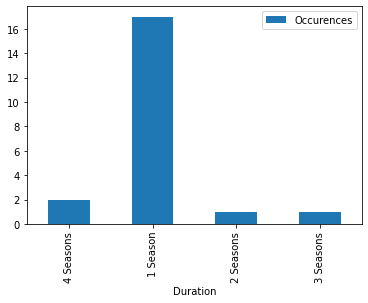

In [17]:
c = Counter()
for type, duration in zip(df1.type, df1.duration):
    if type != "TV Show":
        continue
    c[duration] += 1
 
df0 = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns={'index': 'Duration', 0: 'Occurences' })
df0.plot.bar(x='Duration')
None

### Ερώτημα 11

In [18]:
top_n = 100

df1 = pd.read_csv(netflix_titles)
df2 = pd.read_csv(imdb_movies, low_memory=False)
df3 = pd.read_csv(imdb_ratings)
df0 = pd.merge(df2[['imdb_title_id', 'title']], df1[['show_id', 'title']], how='inner', on='title')
df0 = pd.merge(df0, df3[['imdb_title_id', 'weighted_average_vote']], how='inner')

print(df0[['title', 'weighted_average_vote']].sort_values(by='weighted_average_vote', ascending=False)[:10])

                              title  weighted_average_vote
991                        Innocent                    9.0
1002                       Breakout                    9.0
398                    Pulp Fiction                    8.9
380                Schindler's List                    8.9
1301                      Inception                    8.8
1669         Much Ado About Nothing                    8.6
227                        Gol Maal                    8.6
736                     City of God                    8.6
2669  Ani... Dr. Kashinath Ghanekar                    8.6
609                         Koshish                    8.6
